# Q5 How do support vector machines handle multi-class classification problems?
1. Support vector machines (SVMs) can be used to solve multi-class classification problems, where the goal is to classify data points into multiple classes. There are several different approaches to handling multi-class classification problems with SVMs, including the one-vs-rest, one-vs-one, and error-correcting output codes (ECOC) methods.
2. The one-vs-rest method involves training multiple binary SVM classifiers, where each classifier is responsible for discriminating between one class and all the other classes. For example, if there are four classes, the one-vs-rest method would train four SVM classifiers, where the first classifier is responsible for discriminating between class 1 and classes 2, 3, and 4, the second classifier is responsible for discriminating between class 2 and classes 1, 3, and 4, and so on.
3. The one-vs-one method involves training a binary SVM classifier for every pair of classes. For example, if there are four classes, the one-vs-one method would train six SVM classifiers, where the first classifier is responsible for discriminating between classes 1 and 2, the second classifier is responsible for discriminating between classes 1 and 3, and so on.
4. The error-correcting output codes (ECOC) method involves training multiple binary SVM classifiers and combining their outputs using a coding scheme. The coding scheme is used to map the outputs of the binary classifiers to the different classes, allowing the SVM model to make predictions for multiple classes.
5. Overall, there are several approaches to handling multi-class classification problems with SVMs, and the appropriate approach will depend on the specific characteristics of the data and the problem that you are trying to solve.


## One vs Rest

Note : in sklearn SVC implement the one vs one strategy

In [42]:
from sklearn.svm import SVC

# Sample training data
# The first column is the feature, and the second column is the class (0, 1, or 2)
X_train = [[0.1, 0], [0.3, 0], [0.5, 1], [0.7, 1], [0.9, 2]]
y_train = [0, 0, 1, 1, 2]

# Sample test data
X_test = [[0.2, 0], [0.4, 1], [0.6, 1], [0.8, 2]]

# Create the SVM model
model = SVC(kernel="linear", C=1)

# Train the model on the training data
# The classes are encoded as 0, 1, 2, ...
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)
print(predictions)

[0 1 1 2]
[0 1 1 2]


This implementation of the one-vs-rest method trains a separate SVM classifier for each class, where each classifier is responsible for discriminating between one class and all the other classes. The predictions are made by combining the outputs of the individual classifiers using a voting scheme. This allows the SVM model to make predictions for multiple classes

In the one-vs-rest method for multi-class classification using support vector machines (SVMs), a separate SVM classifier is trained for each class, where each classifier is responsible for discriminating between one class and all the other classes. Therefore, if there are n classes, there will be n trained classifiers in total

In [43]:
# import the OneVsRestClassifier class
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)


In [44]:
# create the one vs. rest classifier
one_vs_rest_classifier_svc = OneVsRestClassifier(estimator=SVC(kernel="rbf", C=1))
one_vs_rest_classifier_svc.fit(X, y)
one_vs_rest_classifier_svc.score(X, y)

0.9533333333333334

0.9533333333333334

In [45]:
one_vs_rest_classifier_svc.estimators_

[SVC(C=1), SVC(C=1), SVC(C=1)]

[SVC(C=1), SVC(C=1), SVC(C=1)]

In [46]:
print(one_vs_rest_classifier_svc.classes_)

[0 1 2]
[0 1 2]


In [47]:
one_vs_rest_classifier_svc.label_binarizer_

LabelBinarizer(sparse_output=True)

LabelBinarizer(sparse_output=True)

In [48]:
one_vs_rest_classifier_svc.multilabel_

False

False

In [49]:
one_vs_rest_classifier_svc.n_features_in_

4

4

In [50]:
one_vs_rest_classifier_lr = OneVsRestClassifier(estimator=LogisticRegression(penalty="l2"))
one_vs_rest_classifier_lr.fit(X, y)
one_vs_rest_classifier_lr.score(X, y)

0.9533333333333334

0.9533333333333334

In [51]:
lr = LogisticRegression(penalty="l2", multi_class="ovr")
lr.fit(X, y)
lr.score(X, y)

0.9533333333333334

0.9533333333333334

## One vs One

In [52]:
from sklearn.svm import SVC
import numpy as np

# Sample training data
# The first column is the feature, and the second column is the class (0, 1, or 2)
X_train = np.array([[0.1, 0], [0.3, 0], [0.5, 1], [0.7, 1], [0.9, 2]])
y_train = np.array([0, 0, 1, 1, 2])

# Sample test data
X_test = np.array([[0.2, 0], [0.4, 1], [0.6, 1], [0.8, 2]])

# Create a dictionary to store the trained classifiers
classifiers = {}

# Get the number of classes
n_classes = len(set(y_train))

# Loop over the pairs of classes
for i in range(n_classes):
    for j in range(i + 1, n_classes):
        # Create the SVM model
        model = SVC(kernel="linear", C=1)

        # Create a mask to select the data points belonging to the two classes
        mask = (y_train == i) | (y_train == j)
        X_train_subset = X_train[mask]
        y_train_subset = y_train[mask]

        # Train the model on the subset of the training data
        model.fit(X_train_subset, y_train_subset)

        # Store the trained classifier in the dictionary
        classifiers[(i, j)] = model

# Make predictions on the test data
predictions = []

# Loop over the test data points
for x in X_test:
    # Create a dictionary to store the votes for each class
    votes = {}

    # Loop over the trained classifiers
    for (i, j), model in classifiers.items():
        # Use the classifier to make a prediction
        y_pred = model.predict([x])[0]

        # Increment the vote count for the predicted class
        if y_pred == i:
            votes[i] = votes.get(i, 0) + 1
        else:
            votes[j] = votes.get(j, 0) + 1

    # Determine the class with the most votes
    y_pred = max(votes.keys(), key=votes.get)

    # Append the predicted class to the list of predictions
    predictions.append(y_pred)


In [53]:
print(predictions)

[0, 1, 1, 2]
[0, 1, 1, 2]


In [54]:
classifiers

{(0, 1): SVC(C=1, kernel='linear'),
 (0, 2): SVC(C=1, kernel='linear'),
 (1, 2): SVC(C=1, kernel='linear')}

{(0, 1): SVC(C=1, kernel='linear'),
 (0, 2): SVC(C=1, kernel='linear'),
 (1, 2): SVC(C=1, kernel='linear')}

The number of classifiers that are trained in the one-vs-one method for multi-class classification using support vector machines (SVMs) is equal to the number of pairs of classes. For example, if there are n classes, the one-vs-one method would train n * (n - 1) / 2 classifiers.

In [55]:
from sklearn.multiclass import OneVsOneClassifier

one_vs_one_classifier = OneVsOneClassifier(estimator=SVC(kernel="linear", C=1))
one_vs_one_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(C=1, kernel='linear'))

OneVsOneClassifier(estimator=SVC(C=1, kernel='linear'))

In [56]:
print(one_vs_one_classifier.predict(X_test))

[0 1 1 2]
[0 1 1 2]


In [57]:
one_vs_one_classifier.estimators_, one_vs_one_classifier.pairwise_indices_

((SVC(C=1, kernel='linear'),
  SVC(C=1, kernel='linear'),
  SVC(C=1, kernel='linear')),
 None)

((SVC(C=1, kernel='linear'),
  SVC(C=1, kernel='linear'),
  SVC(C=1, kernel='linear')),
 None)

In [58]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=100, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
X, y = load_iris(return_X_y=True)
clf = OutputCodeClassifier(
    estimator=SVC(random_state=0),
    random_state=0, code_size=2).fit(X, y)
X_test = [[6.3, 2.7, 4.9, 1.8]]
clf.predict(X_test)

array([2])

array([2])

In [59]:
clf.code_book_

array([[ 1.,  1.,  1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1.]])

array([[ 1.,  1.,  1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1.]])

In [60]:
estimators = clf.estimators_
estimators

[SVC(random_state=0),
 _ConstantPredictor(),
 SVC(random_state=0),
 SVC(random_state=0),
 SVC(random_state=0),
 _ConstantPredictor()]

[SVC(random_state=0),
 _ConstantPredictor(),
 SVC(random_state=0),
 SVC(random_state=0),
 SVC(random_state=0),
 _ConstantPredictor()]

In [61]:
clf.classes_

array([0, 1, 2])

array([0, 1, 2])

In [62]:
from sklearn.multiclass import _predict_binary
from sklearn.metrics import euclidean_distances

Y = np.array([_predict_binary(e, X_test) for e in estimators]).T
pred = euclidean_distances(Y, clf.code_book_).argmin(axis=1)

In [63]:
pred

array([2], dtype=int64)

array([2], dtype=int64)

In [64]:
Y

array([[-0.0038881 ,  1.        , -0.16183014, -1.61411258,  0.00422566,
         1.        ]])

array([[-0.0038881 ,  1.        , -0.16183014, -1.61411258,  0.00422566,
         1.        ]])

# Q8 Can you explain the concept of margin and support vectors in a support vector machine?
1. In a support vector machine (SVM), the margin is the distance between the decision boundary or hyperplane and the closest data points from different classes. The margin is a measure of the separation between the classes in the data, and can be used to evaluate the performance of the SVM model.
2. The support vectors are the data points that are closest to the decision boundary, and are used to determine the optimal hyperplane. These data points are the most critical for determining the correct classification of the data, and are used to calculate the margin.
3. The SVM algorithm aims to maximize the margin by finding the hyperplane that is as far away as possible from the support vectors, while still correctly classifying the data. This maximized margin provides a clear separation between the classes in the data, and helps to improve the generalization performance of the model.
4. In cases where the data is not linearly separable, the SVM algorithm uses a kernel function to map the data into a higher-dimensional space where it becomes linearly separable. The support vectors in the higher-dimensional space are used to determine the optimal hyperplane, and the margin is calculated in the transformed space. This allows SVM to handle non-linear data and find the best possible decision boundary.


In [65]:
# generate synthetic data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")


# X_train, y_train = make_classification(n_samples=60, n_features=2, n_classes=2,
#                            n_informative=2,
#                            n_redundant=0,random_state=42,class_sep=1)

# x1 = np.linspace(start=-3,stop=3,num=10)
# X_train = np.r_[np.array(list(zip(x1,[1]*len(x1)))),
#                 np.array(list(zip(x1,[-1]*len(x1))))]
# y_train = X_train[:,1]



# # split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)


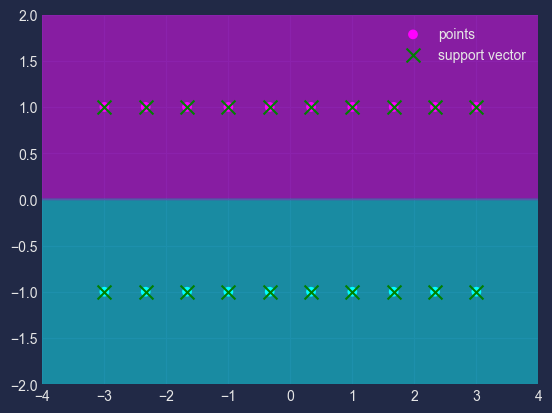

In [89]:
x1 = np.linspace(start=-3,stop=3,num=10)
X_train = np.r_[np.array(list(zip(x1,[1]*len(x1)))),
                np.array(list(zip(x1,[-1]*len(x1))))]
y_train = X_train[:,1]

clf = SVC(kernel ="rbf",C=0.1)

# fit model on training data
clf.fit(X_train, y_train)

# access support vectors
support_vectors = clf.support_vectors_

disp = DecisionBoundaryDisplay.from_estimator(clf,X_train,response_method="predict",alpha=0.5)

# plot data points and support vectors
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train,label="points")
disp.ax_.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='x',label="support vector")
plt.legend()
plt.show()

the number of support vectors when using the RBF kernel can be higher compared to other kernel functions, such as the linear or polynomial kernels. This is because the RBF kernel maps the data points closer to the origin in the higher-dimensional space, resulting in a higher density of data points near the origin. This leads to more data points being selected as support vectors, as they are the closest to the decision boundary.

The number of support vectors when using the RBF kernel can be influenced by the gamma value, which controls the width of the Gaussian function. A higher gamma value results in a narrower Gaussian function, which maps the data points closer to the origin in the higher-dimensional space. This results in a higher number of support vectors, as the data points are more densely packed near the origin.

On the other hand, a lower gamma value results in a wider Gaussian function, which maps the data points farther from the origin in the higher-dimensional space. This results in a lower number of support vectors, as the data points are more evenly distributed in the higher-dimensional space.

Therefore, the choice of gamma value can affect the performance and generalization ability of the SVM model

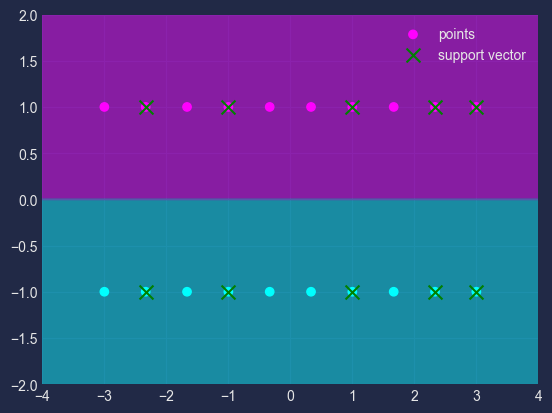

In [88]:
x1 = np.linspace(start=-3,stop=3,num=10)
X_train = np.r_[np.array(list(zip(x1,[1]*len(x1)))),
                np.array(list(zip(x1,[-1]*len(x1))))]
y_train = X_train[:,1]


clf = SVC(kernel="linear",C=0.1)
clf.fit(X_train,y_train)

# plot the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(estimator=clf,X=X_train,response_method="predict",alpha=0.5)
disp.ax_.scatter(X_train[:,0],X_train[:,1],c=y_train,label="points")

# plot the support vector
disp.ax_.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],marker ="x",c="g",s=100,label="support vector")
plt.legend()
plt.show()

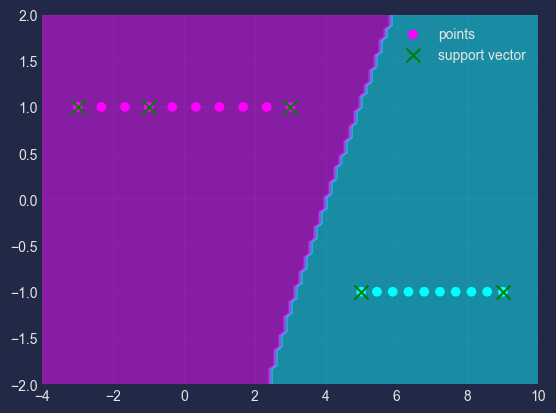

In [87]:
x1 = np.linspace(start=-3,stop=3,num=10)
x2 = np.linspace(start=5,stop=9,num=10)
X_train = np.r_[np.array(list(zip(x1,[1]*len(x1)))),
                np.array(list(zip(x2,[-1]*len(x1))))]
y_train = X_train[:,1]
clf = SVC(kernel ="rbf",C=100,gamma=0.1)

# fit model on training data
clf.fit(X_train, y_train)

# access support vectors
support_vectors = clf.support_vectors_

disp = DecisionBoundaryDisplay.from_estimator(clf,X_train,response_method="predict",alpha=0.5)

# plot data points and support vectors
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train,label="points")
disp.ax_.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='x',label="support vector")
plt.legend()
plt.show()

In [86]:
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=0)

outlier = np.array([[10, 10], [15, 15], [20, 20]])

# add a few outliers to the dataset
X = np.concatenate((X_train, outlier), axis=0)
y = np.concatenate((y_train, np.array([0, 0, 0])), axis=0)

clf = SVC()

# fit model on training data
clf.fit(X_train, y_train)

# access support vectors
support_vectors = clf.support_vectors_

disp = DecisionBoundaryDisplay.from_estimator(clf,X_train,response_method="predict",alpha=0.5)

# plot data points and support vectors
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,label="points")
disp.ax_.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='x',label="support vector")
disp.ax_.scatter(outlier[:, 0], outlier[:, 1], s=100, c='g', marker='o',label="outlier")
plt.legend()
plt.show()

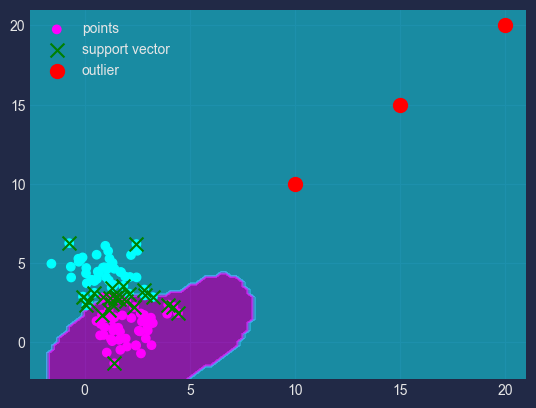

In [83]:
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples=100, centers=2, random_state=0)

outlier = np.array([[10, 10], [15, 15], [20, 20]])

# add a few outliers to the dataset
X = np.concatenate((X_train, outlier), axis=0)
y = np.concatenate((y_train, np.array([0, 0, 0])), axis=0)

clf = SVC()

# fit model on training data
clf.fit(X_train, y_train)

# access support vectors
support_vectors = clf.support_vectors_

disp = DecisionBoundaryDisplay.from_estimator(clf,X,response_method="predict",alpha=0.5)

# plot data points and support vectors
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,label="points")
disp.ax_.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, c='g', marker='x',label="support vector")
disp.ax_.scatter(outlier[:, 0], outlier[:, 1], s=100, c='r', marker='o',label="outlier")
plt.legend()
plt.show()

# Q15 How do you handle imbalanced data when using a support vector machine for classification?
1. When using a support vector machine (SVM) for classification, imbalanced data can be a challenge because the SVM algorithm is designed to maximize the margin between the classes. This can lead to poor performance on the minority class, which can be problematic if the minority class is the one that we are interested in predicting.
2. To handle imbalanced data when using an SVM, there are several approaches that can be tried. One approach is to use weighting to give more importance to the minority class. This can be done by setting the parameter class_weight="balanced" when fitting the SVM model in scikit-learn. This will automatically weight the classes so that the SVM is more sensitive to the minority class.
3. Another approach is to use stratified sampling to create a more balanced dataset. This involves sampling the data so that the ratio of the classes is the same in the training and test sets. This can help to ensure that the SVM model is trained and evaluated on a balanced dataset, which can improve its performance on the minority class.
4. Finally, you can try using different kernel functions or changing the values of the hyperparameters in the SVM model. For example, using a non-linear kernel or increasing the value of the hyperparameter C (which controls the penalty for misclassification) can sometimes improve the performance of the SVM model on imbalanced data. It is worth trying a few different approaches and seeing which one produces the best results for your specific dataset and problem.


In [71]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
# Generate synthetic data with 2 features and 2 classes
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_clusters_per_class=1, random_state=0,
                           weights=[0.9],n_redundant=0)


## With imbalance data

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=555)
print("shape",X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))
# Create an SVM model with class weighting to handle imbalanced data
clf = SVC()

# Train the SVM model on the training data
clf.fit(X_train, y_train)

# Evaluate the SVM model on the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("f1 score :",f1_score(y_test,clf.predict(X_test)))

shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.9
f1 score : 0.33333333333333337
shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.9
f1 score : 0.33333333333333337


## Stratified split

In [73]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=555)
print("shape",X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))
# Create an SVM model with class weighting to handle imbalanced data
clf = SVC()

# Train the SVM model on the training data
clf.fit(X_train, y_train)

# Evaluate the SVM model on the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("f1 score :",f1_score(y_test,clf.predict(X_test)))

shape (160, 2) (160,) (40, 2) (40,)
[144  16]
[36  4]
Accuracy: 0.975
f1 score : 0.8571428571428571
shape (160, 2) (160,) (40, 2) (40,)
[144  16]
[36  4]
Accuracy: 0.975
f1 score : 0.8571428571428571


In [74]:
print(clf.class_weight_)

[1. 1.]
[1. 1.]


## Using the class weight

In [75]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)
print("shape",X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))
# Create an SVM model with class weighting to handle imbalanced data
clf = SVC(class_weight="balanced")

# Train the SVM model on the training data
clf.fit(X_train, y_train)

# Evaluate the SVM model on the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("f1 score :",f1_score(y_test,clf.predict(X_test)))

shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.975
f1 score : 0.9090909090909091
shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.975
f1 score : 0.9090909090909091


In [76]:
print(clf.class_weight_)

[0.55172414 5.33333333]
[0.55172414 5.33333333]


## Controlling the C

In [77]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)
print("shape",X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))
# Create an SVM model with class weighting to handle imbalanced data
clf = SVC(C=100)

# Train the SVM model on the training data
clf.fit(X_train, y_train)

# Evaluate the SVM model on the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

print("f1 score :",f1_score(y_test,clf.predict(X_test)))

shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.925
f1 score : 0.6666666666666665
shape (160, 2) (160,) (40, 2) (40,)
[145  15]
[35  5]
Accuracy: 0.925
f1 score : 0.6666666666666665


# Q18 Can you describe the process of using a support vector machine for feature selection?
1. Support vector machines (SVMs) can be used for feature selection in a supervised learning setting. Feature selection is the process of selecting a subset of relevant features from a larger set of features for use in model training. The goal of feature selection is to improve the performance of the model by reducing the complexity and noise in the data, and by eliminating irrelevant features that do not contribute to the predictive power of the model.
2. One way to use SVMs for feature selection is by training an SVM classifier on the training data, with the goal of maximizing the margin between the decision boundary and the data points. This process of maximizing the margin can be thought of as selecting the most relevant features in the data, since these are the features that contribute most to the decision boundary.
3. Once the SVM has been trained, the weights of the features can be used to rank the importance of each feature. The features with the highest weights are the most relevant and should be included in the final model.
4. Alternatively, the SVM can be trained using a greedy search algorithm, such as recursive feature elimination (RFE), to iteratively remove the least important features from the model. This can be done by training the SVM on the training data using a subset of the features, and then removing the least important feature from the subset and retraining the SVM on the reduced set of features. This process is repeated until the desired number of features is selected.
5. Overall, the use of SVMs for feature selection can be an effective way to improve the performance of a supervised learning model by identifying and selecting the most relevant features in the data


In [78]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier on the training data
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = svm.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Get the feature weights from the trained SVM
weights = svm.coef_

# Sort the features by their weights
sorted_features = sorted(zip(weights.ravel(), data.feature_names), key=lambda x: abs(x[0]), reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for weight, feature in sorted_features[:10]:
    print(feature)


Accuracy:  0.956140350877193
Top 10 most important features:
worst concavity
texture error
mean radius
worst symmetry
worst compactness
mean concavity
worst concave points
worst smoothness
mean concave points
mean symmetry
Accuracy:  0.956140350877193
Top 10 most important features:
worst concavity
texture error
mean radius
worst symmetry
worst compactness
mean concavity
worst concave points
worst smoothness
mean concave points
mean symmetry


In [79]:
idx = np.argwhere(np.isin(data.feature_names,sorted_features[:20])).ravel()

In [80]:
acc = []
for stop in range(2,len(idx)):
    X_sub = X[:,idx[:stop]]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

    # Train an SVM classifier on the training data
    svm = SVC(kernel="linear")
    svm.fit(X_train, y_train)

    # Evaluate the model on the test set
    accuracy = svm.score(X_test, y_test)
    acc.append(accuracy)


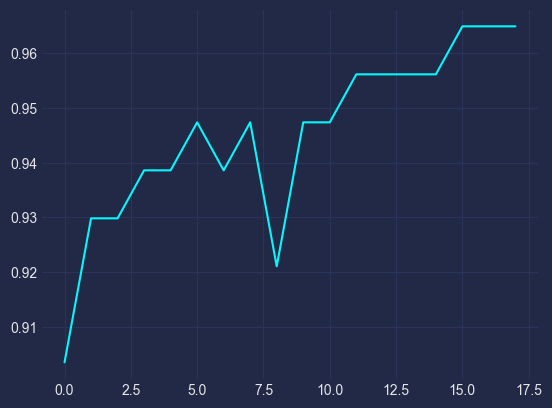

In [84]:
plt.plot(acc)

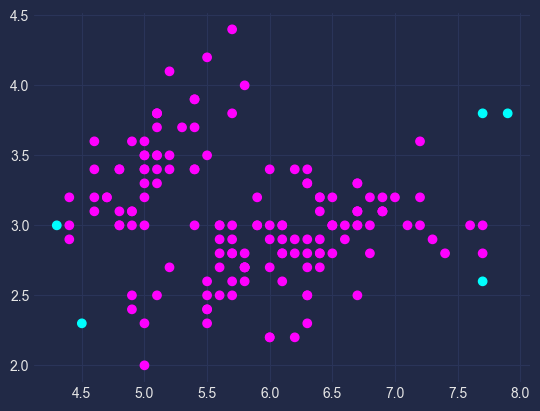

In [85]:
# Import required libraries
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_iris

# Load the breast cancer dataset
data = load_iris()
X = data.data[:,0:2]

# Train an SVM model on the normal data points
svm = OneClassSVM(kernel="rbf",nu=0.03,gamma=0.001)
svm.fit(X)

# Evaluate new data points

predictions = svm.predict(X)

# Print the predicted class for each data point
col = plt.scatter(X[:,0],X[:,1],c=predictions)
